# Pulsar Candidate Recognition using Machine Learning 

### _Authors_ :

>  ### - _Susheela Dahiya_,
>   ### - _Pragyan Jyoti Dutta_,
>   ### - _Siddhi Patil_, 
>   ### - _Punnam Satpathy_
______________________________________________________

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pulsar/Dataset csv.csv


## Importing Necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mt
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor# export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from datetime import datetime


<Figure size 432x216 with 0 Axes>

## Loading the Dataset

In [3]:
df = "../input/pulsar-dataset"

In [4]:
data =  pd.read_csv('../input/pulsar/Dataset csv.csv')

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class HTRU 2
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class HTRU 2
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class HTRU 2                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
data.shape

(17898, 9)

In [9]:
data.isna().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class HTRU 2                                    0
dtype: int64

### Key-takaways:

- No null values are present

## Exploratory Data Analysis

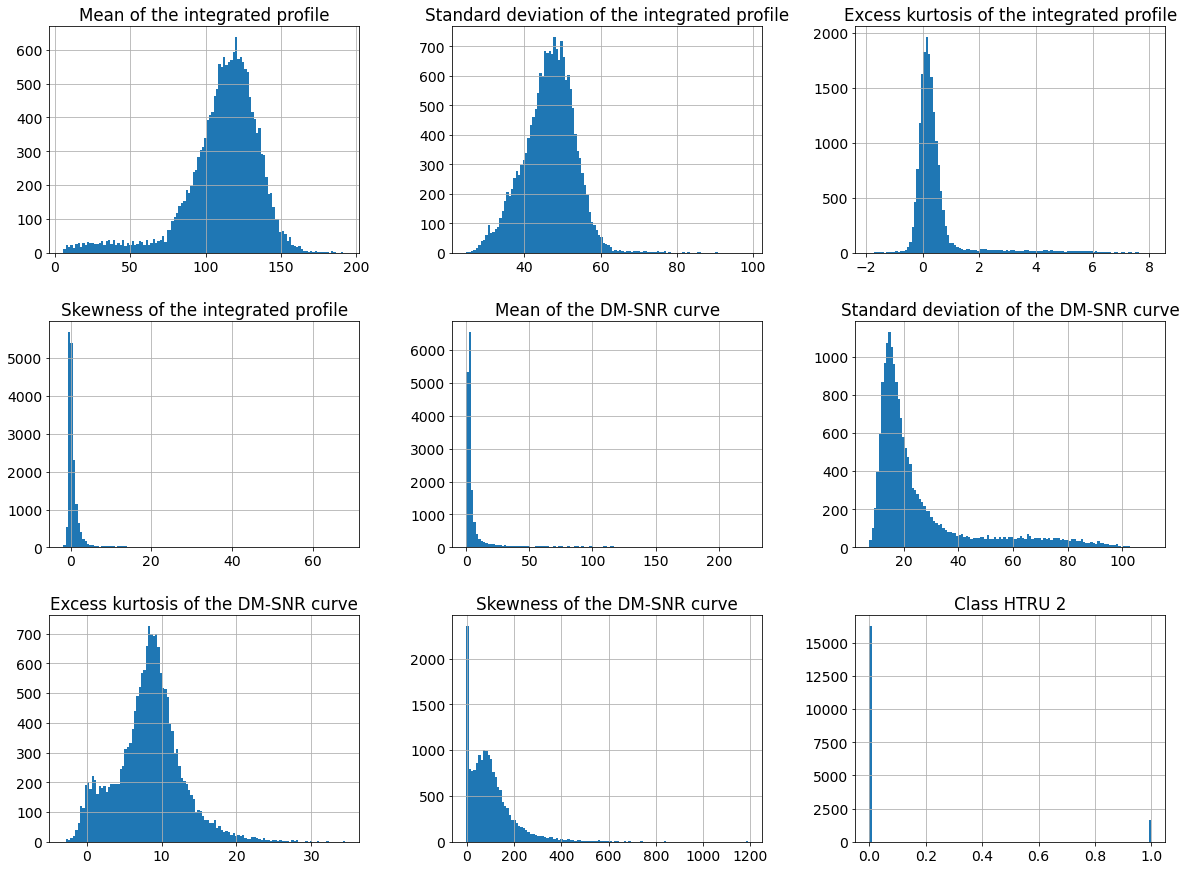

In [10]:
data.hist(bins=120, figsize=(20,15))
plt.show();
    

In [11]:
data['Class HTRU 2'].value_counts()

0    16259
1     1639
Name: Class HTRU 2, dtype: int64

In [12]:
percentage = data['Class HTRU 2'].value_counts()/len(data)*100
percentage

0    90.842552
1     9.157448
Name: Class HTRU 2, dtype: float64

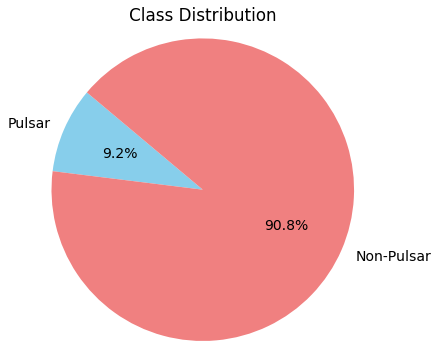

In [13]:
positive_percentage = 9.157448
negative_percentage = 90.842552

# Data for the pie chart
labels = ['Pulsar', 'Non-Pulsar']
sizes = [positive_percentage, negative_percentage]
colors = ['skyblue', 'lightcoral']

# Create the pie chart without explode and shadow
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution')
plt.show()

Text(0.5, 1.0, 'Correlation between Variables')

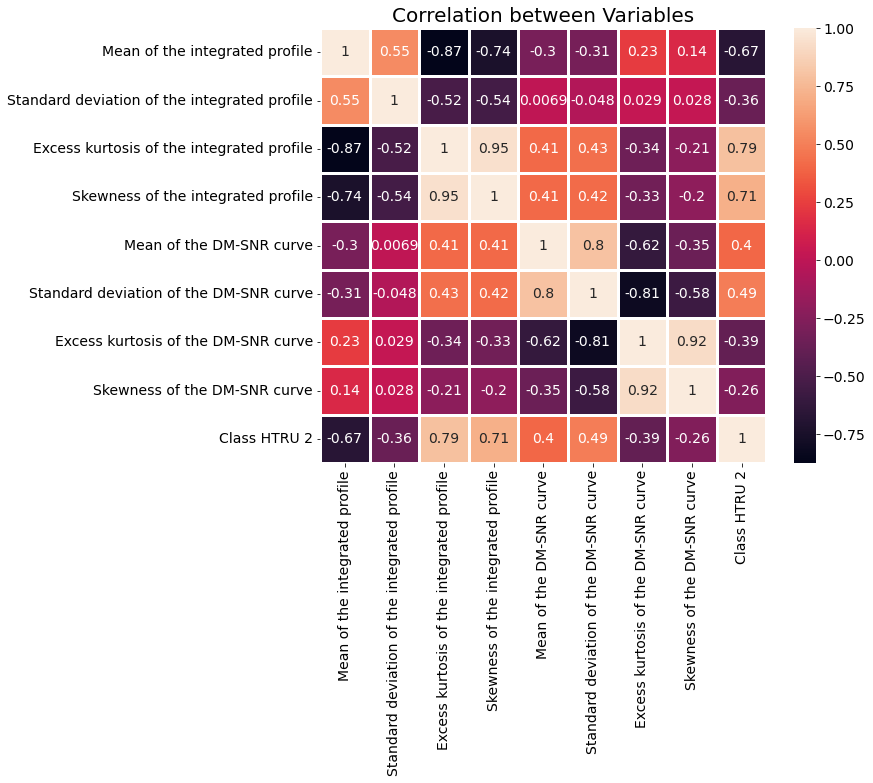

In [14]:
heat_map = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, linewidth=3)
plt.title("Correlation between Variables", fontsize=20)

In [15]:
correlation_with_class = heat_map["Class HTRU 2"].sort_values(ascending=False)

# Print out the sorted correlations with "Class HTRU 2"
print(correlation_with_class)


Class HTRU 2                                    1.000000
Excess kurtosis of the integrated profile       0.791591
Skewness of the integrated profile              0.709528
Standard deviation of the DM-SNR curve          0.491535
Mean of the DM-SNR curve                        0.400876
Skewness of the DM-SNR curve                   -0.259117
Standard deviation of the integrated profile   -0.363708
Excess kurtosis of the DM-SNR curve            -0.390816
Mean of the integrated profile                 -0.673181
Name: Class HTRU 2, dtype: float64


From the above we see that our target i.e. **Class HTRU 2** is correlated the most to **Excess kurtosis of the integrated profile,Skewness of the integrated profile,Standard deviation of the DM-SNR curve,Mean of the DM-SNR curve**.

- Therefore it would be helpful if we include the other columns for our modelling purposes

## Splitting the dataset

In [16]:
X = data.drop("Class HTRU 2", axis = 1)
y = data["Class HTRU 2"]

In [17]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

### Defining some functions to be used later

In [18]:
# Function to plot PR curves

from sklearn.metrics import precision_recall_curve, average_precision_score

def pr_curve(X_train, y_train, classifier):
    
    # Split the data into a training and validation set
    from sklearn.model_selection import train_test_split
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Train the classifier
    classifier.fit(X_train_split, y_train_split)
    
    # Get the predicted probabilities on the validation set
    y_scores = classifier.predict_proba(X_val)[:, 1]
    
    # Compute PR curve values
    precision, recall, _ = precision_recall_curve(y_val, y_scores)
    average_precision = average_precision_score(y_val, y_scores)
    
    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.step(recall, precision, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()



In [19]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

def report(model, X_test, y_test):
    """
    Display the classification report, F1-micro score, and a graphical confusion matrix for a given model and test data.
    
    Parameters:
    - model: The trained model.
    - X_test: Test data features.
    - y_test: True labels for the test data.
    """

    # Get the predicted labels on the test set
    y_pred = model.predict(X_test)

    # Print the classification report
    report_text = classification_report(y_test, y_pred)
    print("Classification Report:\n", report_text)
    print("-------------------------------------------------------------")

    # Calculate and print the F1-micro score
    f1_micro = f1_score(y_test, y_pred, average='micro')
    print("F1-micro Score:", f1_micro)
    print("-------------------------------------------------------------")

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


# Training on an unbalanced dataset

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


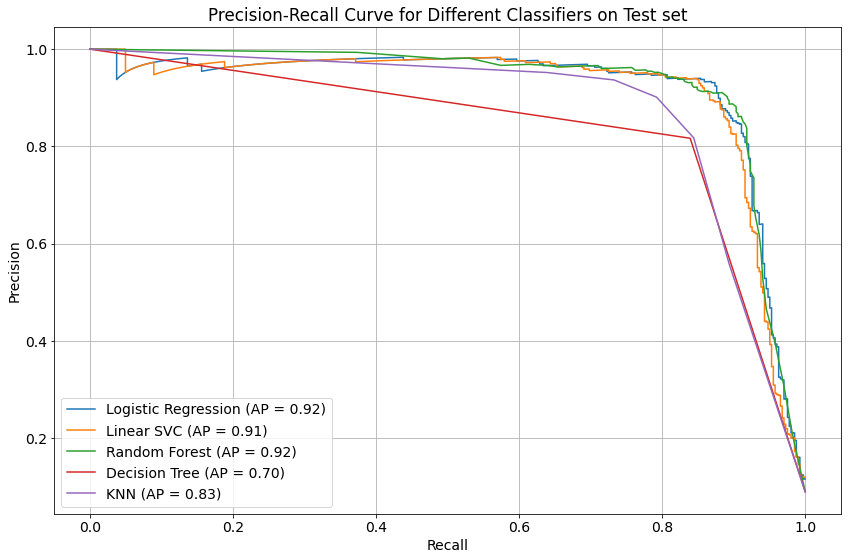

Test set
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4071
           1       0.94      0.85      0.89       404

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475

-------------------------------------------------------------
Test set
Classification Report for Linear SVC:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4071
           1       0.94      0.84      0.89       404

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475

-------------------------------------------------------------
Test set
Classification Report for Random Forest:

              precision    recall  f1-score   support

           

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def aggregate_report_and_pr_curve(X_train, y_train, X_test, y_test):
    # Models to evaluate
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "Linear SVC": LinearSVC(max_iter=10000),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier()
    }

    # For storing results
    avg_precision_scores = {}

    plt.figure(figsize=(12, 8))

    # Loop through the classifiers
    for name, clf in classifiers.items():
        if name == "Linear SVC":
            decision_function = clf.fit(X_train, y_train).decision_function(X_test)
            precision, recall, _ = precision_recall_curve(y_test, decision_function)
        else:
            clf.fit(X_train, y_train)
            probas = clf.predict_proba(X_test)[:, 1]
            precision, recall, _ = precision_recall_curve(y_test, probas)
        
        avg_precision = average_precision_score(y_test, probas if name != "Linear SVC" and name != "SGD Regressor" else decision_function)
        avg_precision_scores[name] = avg_precision

        plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

    # Format the plot
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Different Classifiers on Test set")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print classification report for each classifier
    for name, clf in classifiers.items():
        y_pred = clf.predict(X_test)
        print("Test set")
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test, y_pred))
        print("-------------------------------------------------------------")

    # Return avg precision scores for further analysis if required
    return avg_precision_scores


avg_scores = aggregate_report_and_pr_curve(X_train, y_train, X_test, y_test)
print(avg_scores)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



Ranking by F1 score on test set:

--------------------------------------------------


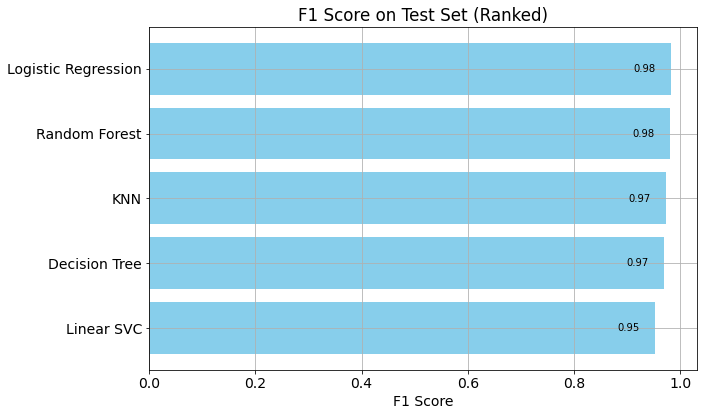


Ranking by ACCURACY score on test set:

--------------------------------------------------


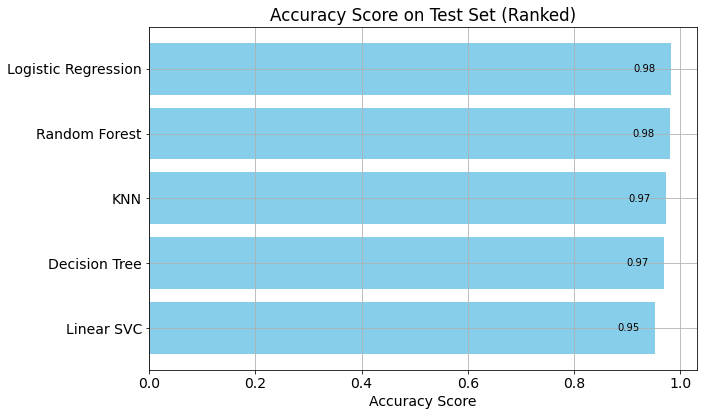


Ranking by PRECISION score on test set:

--------------------------------------------------


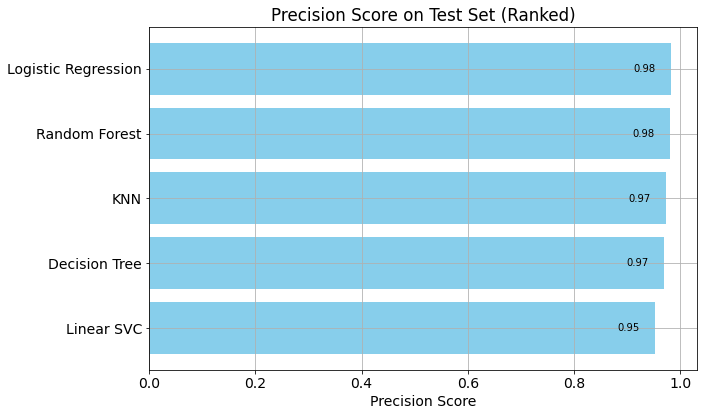


Ranking by RECALL score on test set:

--------------------------------------------------


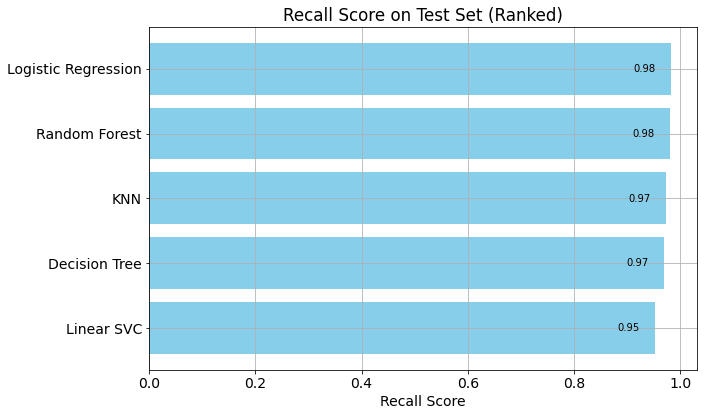

In [21]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np


# Function to calculate scores for a classifier
def calculate_scores(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    return {
        'f1_train': f1_score(y_train, y_pred_train, average='micro'),
        'f1_test': f1_score(y_test, y_pred_test, average='micro'),
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred_test),
        'precision_train': precision_score(y_train, y_pred_train, average='micro'),
        'precision_test': precision_score(y_test, y_pred_test, average='micro'),
        'recall_train': recall_score(y_train, y_pred_train, average='micro'),
        'recall_test': recall_score(y_test, y_pred_test, average='micro')
    }

# Function to plot scores with horizontal bars
def plot_scores_horizontal(ranked_scores, ranked_labels, metric):
    plt.figure(figsize=(10, 6))
    y = np.arange(len(ranked_labels))
    
    test_scores = [score[metric + '_test'] for score in ranked_scores]
    plt.barh(y, test_scores, align='center', color='skyblue')

    # Add scores inside the bars
    for i, v in enumerate(test_scores):
        plt.text(v - 0.03 * max(test_scores), i, f'{v:.2f}', va='center', ha='right', color='black', fontsize=10)

    plt.yticks(y, ranked_labels)
    plt.xlabel(metric.capitalize() + ' Score')
    plt.title(f'{metric.capitalize()} Score on Test Set (Ranked)')
    plt.gca().invert_yaxis()  # invert to have the highest score at the top
    plt.tight_layout()
    plt.show()


# Function to evaluate and rank classifiers
def evaluate_and_rank_classifiers(classifiers, X_train, y_train, X_test, y_test):
    scores = []
    labels = []

    for classifier_name, classifier in classifiers.items():
        score = calculate_scores(classifier, X_train, y_train, X_test, y_test)
        scores.append(score)
        labels.append(classifier_name)

    metrics = ['f1', 'accuracy', 'precision', 'recall']

    for metric in metrics:
        print(f"\nRanking by {metric.upper()} score on test set:\n")
        print("-" * 50)
        
        # Rank classifiers based on the test score of the current metric
        ranked_classifiers = sorted(zip(labels, scores), key=lambda x: x[1][f'{metric}_test'], reverse=True)
        ranked_labels = [x[0] for x in ranked_classifiers]
        ranked_scores = [x[1] for x in ranked_classifiers]
        
        # Plot the ranked classifiers using horizontal bars
        plot_scores_horizontal(ranked_scores, ranked_labels, metric)


# Example classifiers dictionary
classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "Linear SVC": LinearSVC(max_iter=10000),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier()}


evaluate_and_rank_classifiers(classifiers, X_train, y_train, X_test, y_test)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


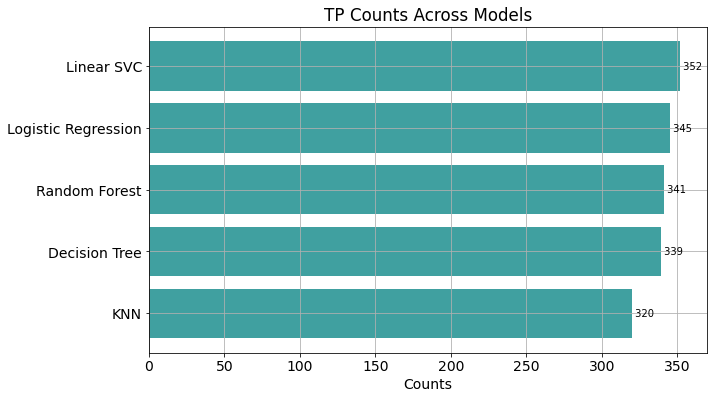

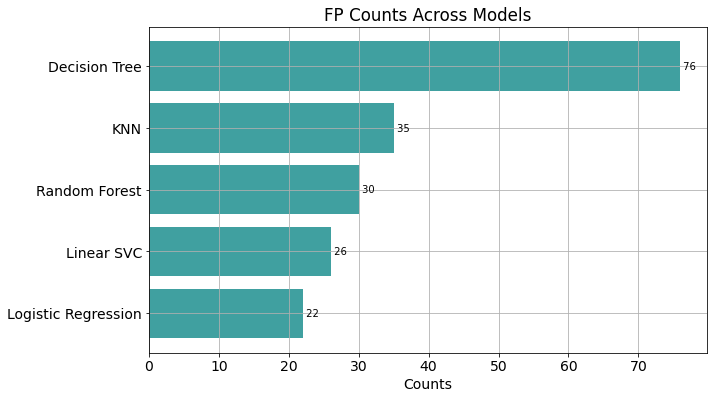

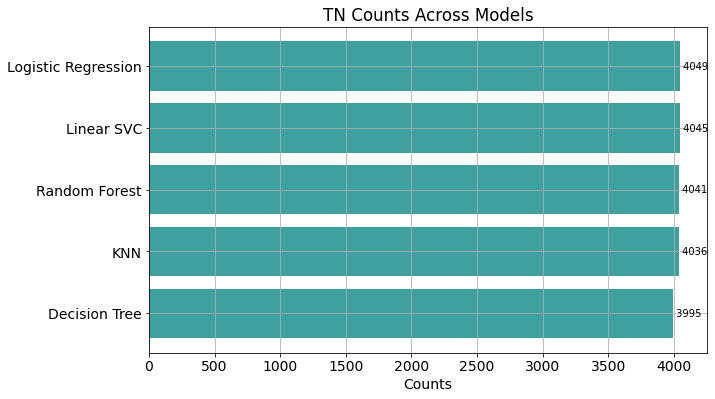

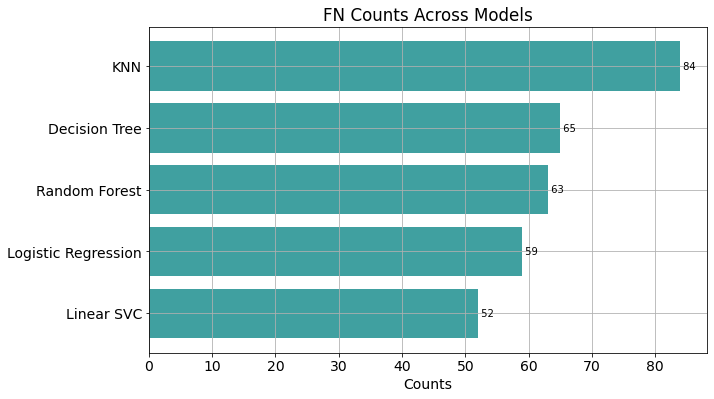

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def evaluate_confusion(classifiers, X_train, y_train, X_test, y_test):
    results = {}

    for name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Predict on the test set
        y_pred = classifier.predict(X_test)

        # Extract TP, FP, TN, and FN values
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        results[name] = {'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn}

    # Plot results
    metrics = ['TP', 'FP', 'TN', 'FN']

    for metric in metrics:
        sorted_results = dict(sorted(results.items(), key=lambda item: item[1][metric], reverse=True))

        names = list(sorted_results.keys())
        values = [val[metric] for val in sorted_results.values()]

        plt.figure(figsize=(10, 6))
        y_pos = np.arange(len(names))
        plt.barh(y_pos, values, align='center', alpha=0.75, color='teal')
        
        # Add values inside the bars
        for i, v in enumerate(values):
            plt.text(v, i, f' {v}', va='center', ha='left', color='black', fontsize=10)
        
        plt.yticks(y_pos, names)
        plt.xlabel('Counts')
        plt.title(f'{metric} Counts Across Models')
        plt.gca().invert_yaxis()  # Invert to display the highest count at the top
        plt.show()

# Example classifiers dictionary
classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "Linear SVC": LinearSVC(max_iter=10000),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier()
}

# Call the function
evaluate_confusion(classifiers, X_train, y_train, X_test, y_test)


## Preliminary models to compare best model for countering data imbalance

### Using Random Forest Classifier with class weight = "balanced"

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')

clf.fit(X_train,y_train)
y_pred_b = clf.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred_b))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4071
           1       0.93      0.84      0.88       404

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



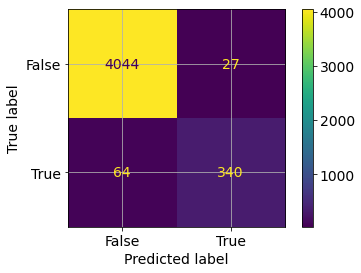

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_b)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

### Using RandomOverSampler

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [28]:
X_train0,X_test0, y_train0,y_test0 = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=1)

In [29]:
clf = RandomForestClassifier()

clf.fit(X_train0,y_train0)
y_pred_os = clf.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4071
           1       0.90      0.90      0.90       404

    accuracy                           0.98      4475
   macro avg       0.94      0.94      0.94      4475
weighted avg       0.98      0.98      0.98      4475



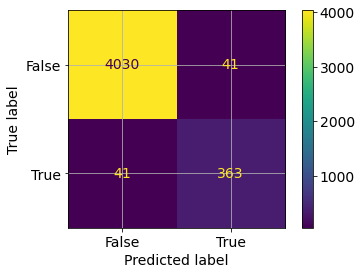

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_os)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

### Using RandomForest with RandomUnderSampler 

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled1, y_resampled1 = rus.fit_resample(X_train, y_train)

In [33]:
X_train1,X_test1, y_train1,y_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.25, random_state=1)

In [34]:
clf = RandomForestClassifier()

clf.fit(X_train1,y_train1)
y_pred_rus = clf.predict(X_test1)

In [35]:
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4071
           1       0.90      0.90      0.90       404

    accuracy                           0.98      4475
   macro avg       0.94      0.94      0.94      4475
weighted avg       0.98      0.98      0.98      4475



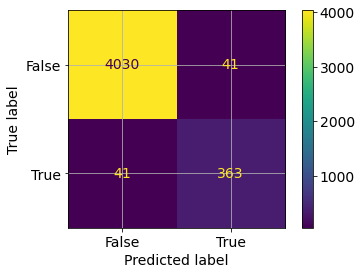

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_os)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

# Approach 1: Apply SMOTE before applying PCA

## Applying SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X, y)

X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

0    16259
1    16259
Name: Class HTRU 2, dtype: int64

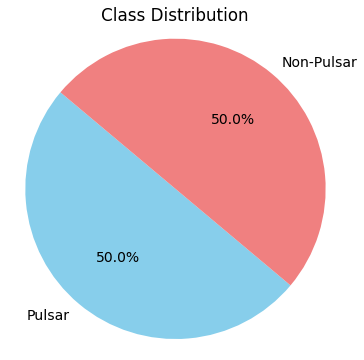

In [38]:
positive_percentage = 50
negative_percentage = 50

# Data for the pie chart
labels = ['Pulsar', 'Non-Pulsar']
sizes = [positive_percentage, negative_percentage]
colors = ['skyblue', 'lightcoral']

# Create the pie chart without explode and shadow
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution')
plt.show()

In [39]:
X_smote.shape

(32518, 8)

In [40]:
y_smote.shape

(32518, 1)

In [41]:
X_smote.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [42]:
y_smote.head()

,Class HTRU 2
0,0
1,0
2,0
3,0
4,0


## Scaling the data

In [43]:
X1 = MinMaxScaler().fit_transform(X_smote)

## Applying Principal Component Analysis (PCA)

In [44]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
#retains 95% of the variance

pca = PCA(n_components=2)

In [45]:
principalComponents = pca.fit_transform(X_smote)

In [46]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [47]:
finalDf = pd.concat([principalDf, y_smote[['Class HTRU 2']]], axis = 1)
finalDf

,principal component 1,principal component 2,Class HTRU 2
0,30.441657,-52.605101,0
1,72.876901,-13.656499,0
2,11.088859,-32.954473,0
3,10.027213,-57.235483,0
4,186.257704,40.136141,0
...,...,...,...
32513,-88.937003,49.031596,1
32514,-52.623574,-35.712667,1
32515,-13.742429,-20.755267,1
32516,-87.478601,38.654059,1


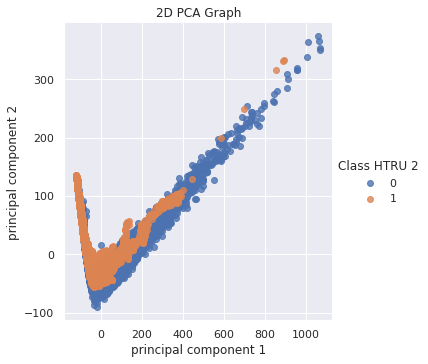

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='principal component 1', 
    y='principal component 2', 
    data=finalDf, 
    hue='Class HTRU 2', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [49]:
pca.explained_variance_ratio_

array([0.78279238, 0.14941864])

In [50]:
X1 = finalDf.drop("Class HTRU 2", axis = 1)
y1 = finalDf["Class HTRU 2"]

## Transforming our training and test data into numpy arrays

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# We are transforming data to numpy array to implement with keras
X_train_a1 = np.array(X_train)
X_test_a1 = np.array(X_test)
y_train_a1 = np.array(y_train)
y_test_a1 = np.array(y_test)

In [52]:
X_train_a1.shape

(22762, 2)

## Model Comparison:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


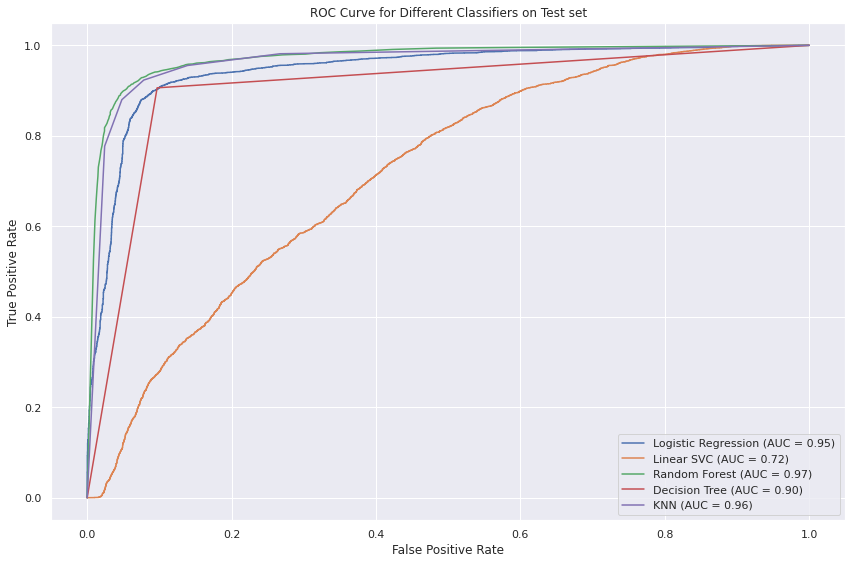

Test set
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4912
           1       0.93      0.85      0.89      4844

    accuracy                           0.89      9756
   macro avg       0.90      0.89      0.89      9756
weighted avg       0.90      0.89      0.89      9756

-------------------------------------------------------------
Test set
Classification Report for Linear SVC:

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      4912
           1       0.64      0.69      0.67      4844

    accuracy                           0.65      9756
   macro avg       0.66      0.65      0.65      9756
weighted avg       0.66      0.65      0.65      9756

-------------------------------------------------------------
Test set
Classification Report for Random Forest:

              precision    recall  f1-score   support

           

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

def aggregate_report_and_roc_curve(X_train, y_train, X_test, y_test):
    # Models to evaluate
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "Linear SVC": LinearSVC(max_iter=10000),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier()
    }

    # For storing results
    auc_scores = {}

    plt.figure(figsize=(12, 8))

    # Loop through the classifiers
    for name, clf in classifiers.items():
        if name == "Linear SVC":
            decision_function = clf.fit(X_train, y_train).decision_function(X_test)
            fpr, tpr, _ = roc_curve(y_test, decision_function)
        else:
            clf.fit(X_train, y_train)
            probas = clf.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, probas)
        
        auc_score = roc_auc_score(y_test, probas if name != "Linear SVC" else decision_function)
        auc_scores[name] = auc_score

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    # Format the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Different Classifiers on Test set")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print classification report for each classifier
    for name, clf in classifiers.items():
        y_pred = clf.predict(X_test)
        print("Test set")
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test, y_pred))
        print("-------------------------------------------------------------")

    # Return AUC scores
    return auc_scores

# Call the function 
auc_scores = aggregate_report_and_roc_curve(X_train_a1, y_train_a1, X_test_a1, y_test_a1)
print(auc_scores)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


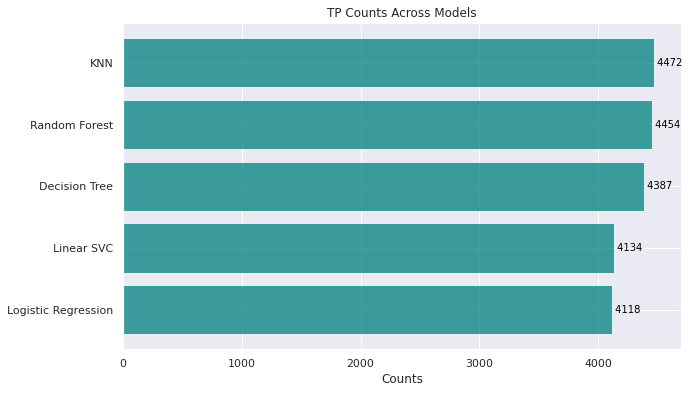

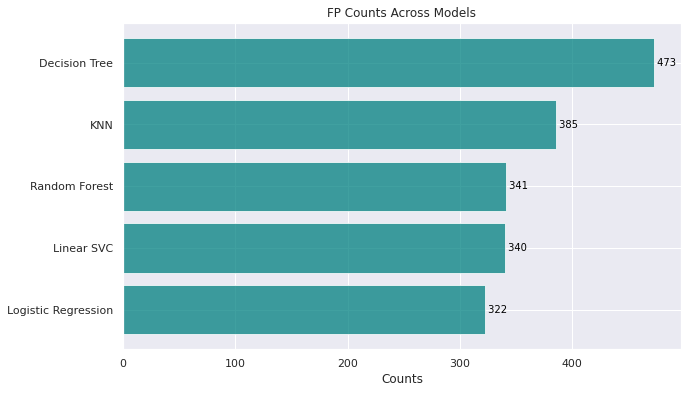

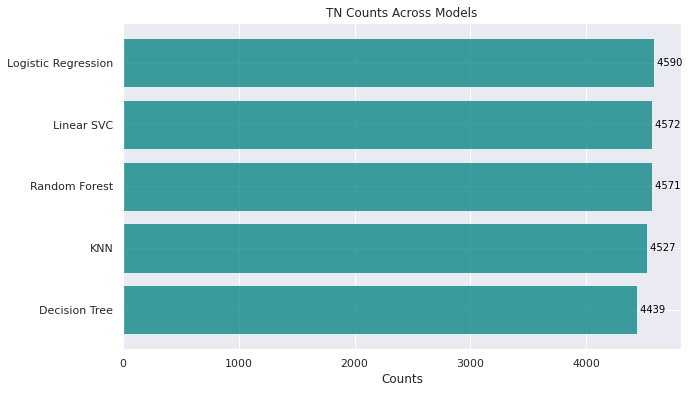

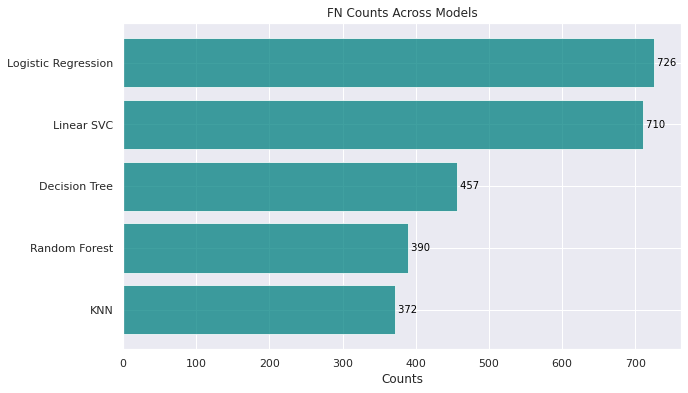

In [54]:
from sklearn.metrics import confusion_matrix

evaluate_confusion(classifiers, X_train_a1, y_train_a1, X_test_a1, y_test_a1)

# Approach 2: Applying PCA first and then SMOTE

### Scaling our data

In [55]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

## Applying Principal Component Analysis (PCA)


In [56]:
# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Convert the principal components to a dataframe
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

## Applying SMOTE


In [57]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(principalDf, y)

X_smote = pd.DataFrame(X_smote, columns = ['principal component 1', 'principal component 2'])
y_smote = pd.DataFrame(y_smote, columns = ['Class HTRU 2'])

y_smote['Class HTRU 2'].value_counts()

0    16259
1    16259
Name: Class HTRU 2, dtype: int64

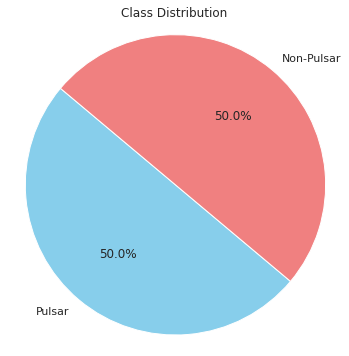

In [58]:
positive_percentage = 50
negative_percentage = 50

labels = ['Pulsar', 'Non-Pulsar']
sizes = [positive_percentage, negative_percentage]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution')
plt.show()


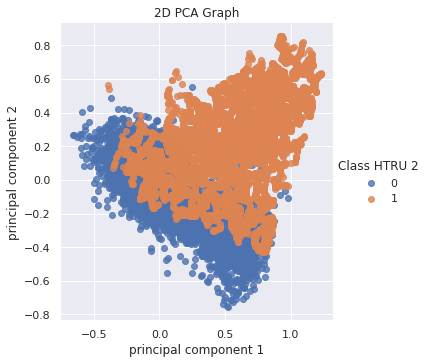

In [59]:
import seaborn as sns

finalDf = pd.concat([X_smote, y_smote], axis = 1)

sns.lmplot(
    x='principal component 1', 
    y='principal component 2', 
    data=finalDf, 
    hue='Class HTRU 2', 
    fit_reg=False, 
    legend=True
)

plt.title('2D PCA Graph')
plt.show()


## Splitting our dataset

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Transform data into numpy array for implementation with Keras or other libraries
X_train_a2 = np.array(X_train)
X_test_a2 = np.array(X_test)
y_train_a2 = np.array(y_train)
y_test_a2 = np.array(y_test)

## Model Comparision2

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, 

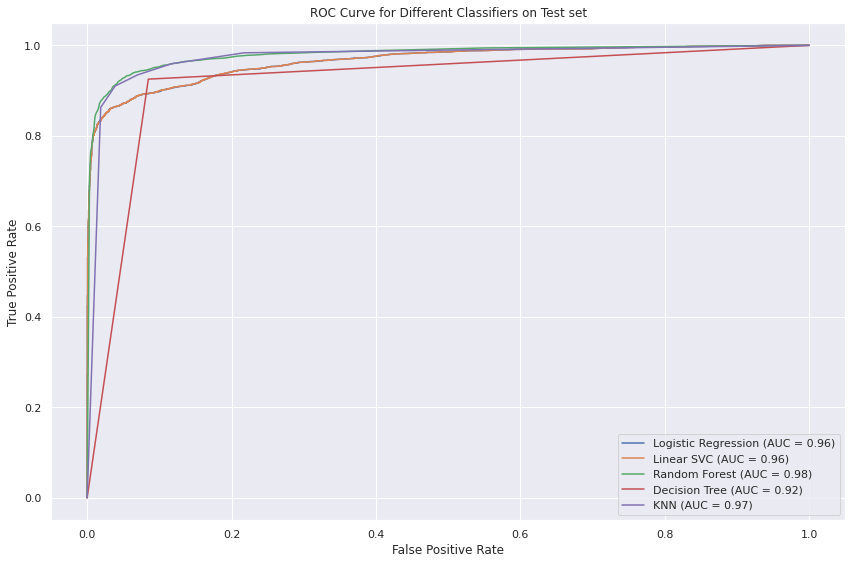

Test set
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4912
           1       0.94      0.87      0.91      4844

    accuracy                           0.91      9756
   macro avg       0.91      0.91      0.91      9756
weighted avg       0.91      0.91      0.91      9756

-------------------------------------------------------------
Test set
Classification Report for Linear SVC:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4912
           1       0.95      0.87      0.91      4844

    accuracy                           0.91      9756
   macro avg       0.91      0.91      0.91      9756
weighted avg       0.91      0.91      0.91      9756

-------------------------------------------------------------
Test set
Classification Report for Random Forest:

              precision    recall  f1-score   support

           

In [61]:
auc_scores = aggregate_report_and_roc_curve(X_train_a2, y_train_a2, X_test_a2, y_test_a2)
print(auc_scores)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

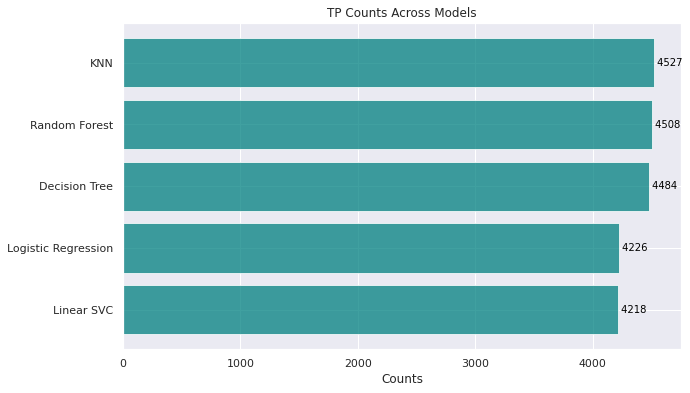

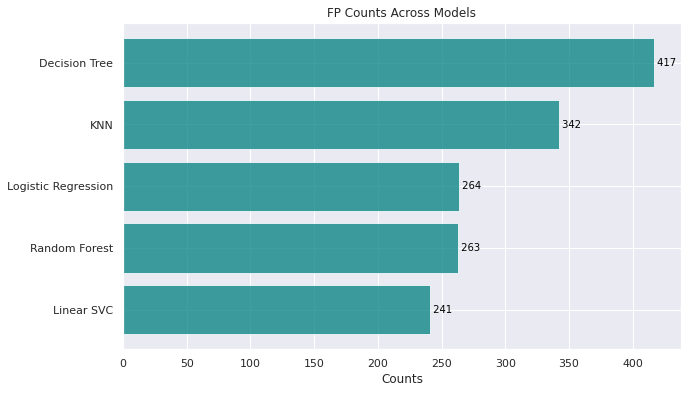

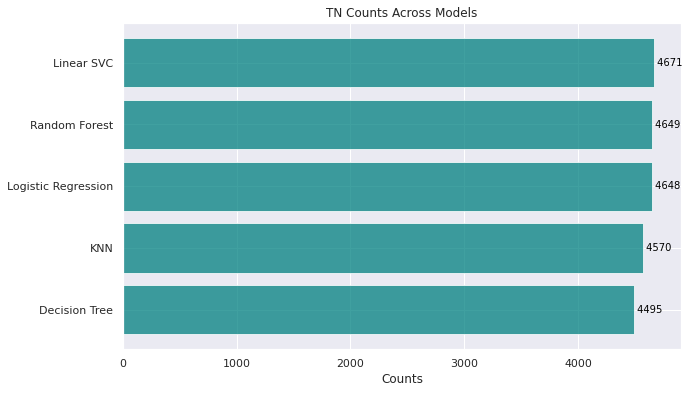

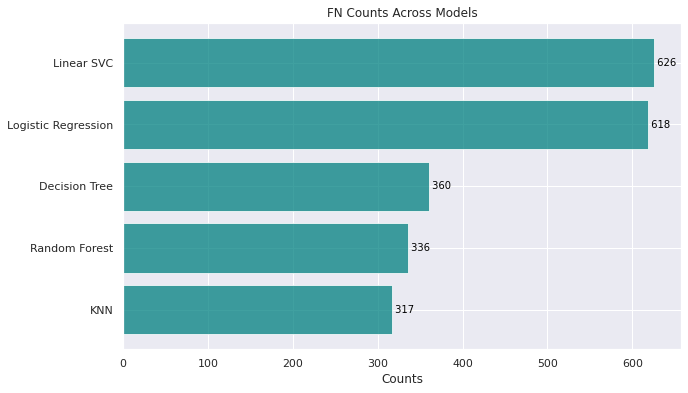

In [62]:
from sklearn.metrics import confusion_matrix

evaluate_confusion(classifiers, X_train_a2, y_train_a2, X_test_a2, y_test_a2)

## Using FNN

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_fnn(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


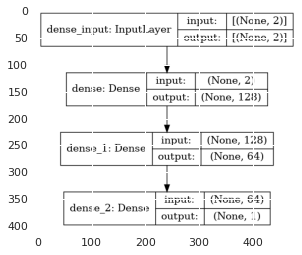

Epoch 1/50
712/712 [==============================] - 3s 3ms/step - loss: 0.3879 - accuracy: 0.8818 - val_loss: 0.3968 - val_accuracy: 0.8946
Epoch 2/50
712/712 [==============================] - 2s 3ms/step - loss: 0.3240 - accuracy: 0.8916 - val_loss: 0.3162 - val_accuracy: 0.8816
Epoch 3/50
712/712 [==============================] - 2s 3ms/step - loss: 0.3218 - accuracy: 0.8955 - val_loss: 0.2851 - val_accuracy: 0.9009
Epoch 4/50
712/712 [==============================] - 2s 2ms/step - loss: 0.2962 - accuracy: 0.8966 - val_loss: 0.2812 - val_accuracy: 0.9026
Epoch 5/50
712/712 [==============================] - 2s 2ms/step - loss: 0.2908 - accuracy: 0.8992 - val_loss: 0.3010 - val_accuracy: 0.8964
Epoch 6/50
712/712 [==============================] - 2s 2ms/step - loss: 0.2859 - accuracy: 0.9014 - val_loss: 0.2700 - val_accuracy: 0.9044
Epoch 7/50
712/712 [==============================] - 2s 2ms/step - loss: 0.2825 - accuracy: 0.8999 - val_loss: 0.2688 - val_accuracy: 0.9029
Epoch 

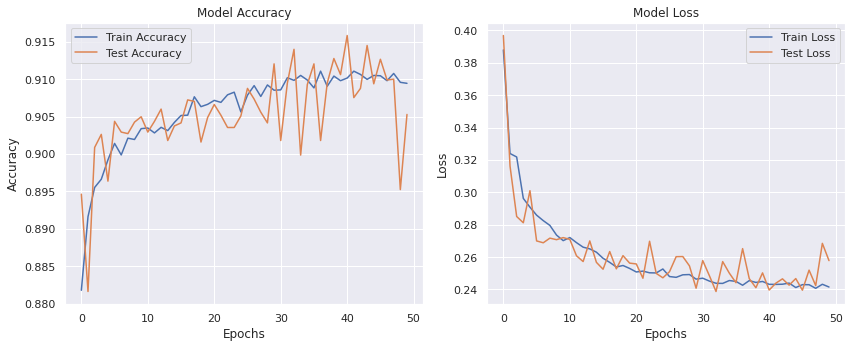

In [64]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

def test_fnn(X_train, y_train, X_test, y_test):
    """
    Test FNN on dataset.

    Args:
    - X_train (np.array): Training data.
    - y_train (np.array): Training labels.
    - X_test (np.array): Testing data.
    - y_test (np.array): Testing labels.

    Returns:
    - history (History object): Contains training/validation loss and accuracy over epochs.
    """
    
    # Build model
    model = build_fnn(input_dim=X_train.shape[1])

    # Plot model architecture
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    img = plt.imread('model_plot.png')
    plt.imshow(img)
    plt.show()

    # Compile model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,  # you can change this
                        batch_size=32)  # you can change this

    # Print final evaluation on test data
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Final test accuracy: {accuracy*100:.2f}%")

    # Predict classes using the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Print a detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot training & validation accuracy and loss values
    plt.figure(figsize=(12, 5))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return history

# For Approach 1: SMOTE --> PCA
history = test_fnn(X_train_a1, y_train_a1, X_test_a1, y_test_a1)


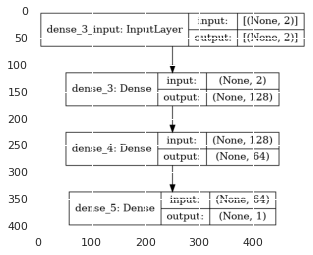

Epoch 1/50
712/712 [==============================] - 2s 3ms/step - loss: 0.2360 - accuracy: 0.9170 - val_loss: 0.2078 - val_accuracy: 0.9194
Epoch 2/50
712/712 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.9227 - val_loss: 0.2052 - val_accuracy: 0.9232
Epoch 3/50
712/712 [==============================] - 2s 3ms/step - loss: 0.2029 - accuracy: 0.9244 - val_loss: 0.2052 - val_accuracy: 0.9203
Epoch 4/50
712/712 [==============================] - 2s 3ms/step - loss: 0.2012 - accuracy: 0.9253 - val_loss: 0.2036 - val_accuracy: 0.9223
Epoch 5/50
712/712 [==============================] - 2s 3ms/step - loss: 0.2003 - accuracy: 0.9254 - val_loss: 0.2046 - val_accuracy: 0.9218
Epoch 6/50
712/712 [==============================] - 2s 3ms/step - loss: 0.2007 - accuracy: 0.9245 - val_loss: 0.2028 - val_accuracy: 0.9224
Epoch 7/50
712/712 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.9258 - val_loss: 0.2024 - val_accuracy: 0.9244
Epoch 

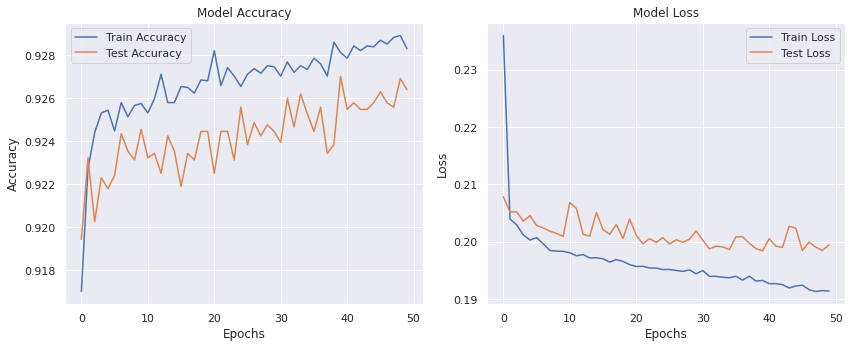

In [65]:
# For Approach2: PCA--> SMOTE

history = test_fnn(X_train_a2, y_train_a2, X_test_a2, y_test_a2)

## Artificial Neural Network

In [66]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout

model = Sequential([Dense(units=20, input_dim = X_train.shape[1], activation='relu'), 
                    Dense(units=24,activation='relu'), 
                    Dropout(0.5), 
                    Dense(units=20,activation='relu'), 
                    Dense(units=24,activation='relu'), Dense(1, activation='sigmoid') ]) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,593
Trainable params: 1,593
Non-trainable params: 0
____________________________________________________

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
759/759 [==============================] - 2s 2ms/step - loss: 0.2777 - accuracy: 0.9032
Epoch 2/5
759/759 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.9227
Epoch 3/5
759/759 [==============================] - 2s 3ms/step - loss: 0.2071 - accuracy: 0.9237
Epoch 4/5
759/759 [==============================] - 2s 2ms/step - loss: 0.2069 - accuracy: 0.9229
Epoch 5/5
759/759 [==============================] - 2s 2ms/step - loss: 0.2061 - accuracy: 0.9243


In [68]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

305/305 [==============================] - 1s 1ms/step - loss: 0.2029 - accuracy: 0.9231
Test Accuracy: 92.31%
Test Loss: 0.2029404491186142


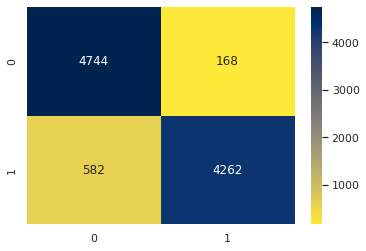

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()